## Regression in Python

###  Step 1: Loading Dataset

In [44]:
import pandas as pd
df = pd.read_csv('co2.csv')
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Exploratory Data Analysis

In [5]:
df.drop(['Make','Model','Vehicle Class','Transmission','Fuel Type'], axis = 1, inplace = True)

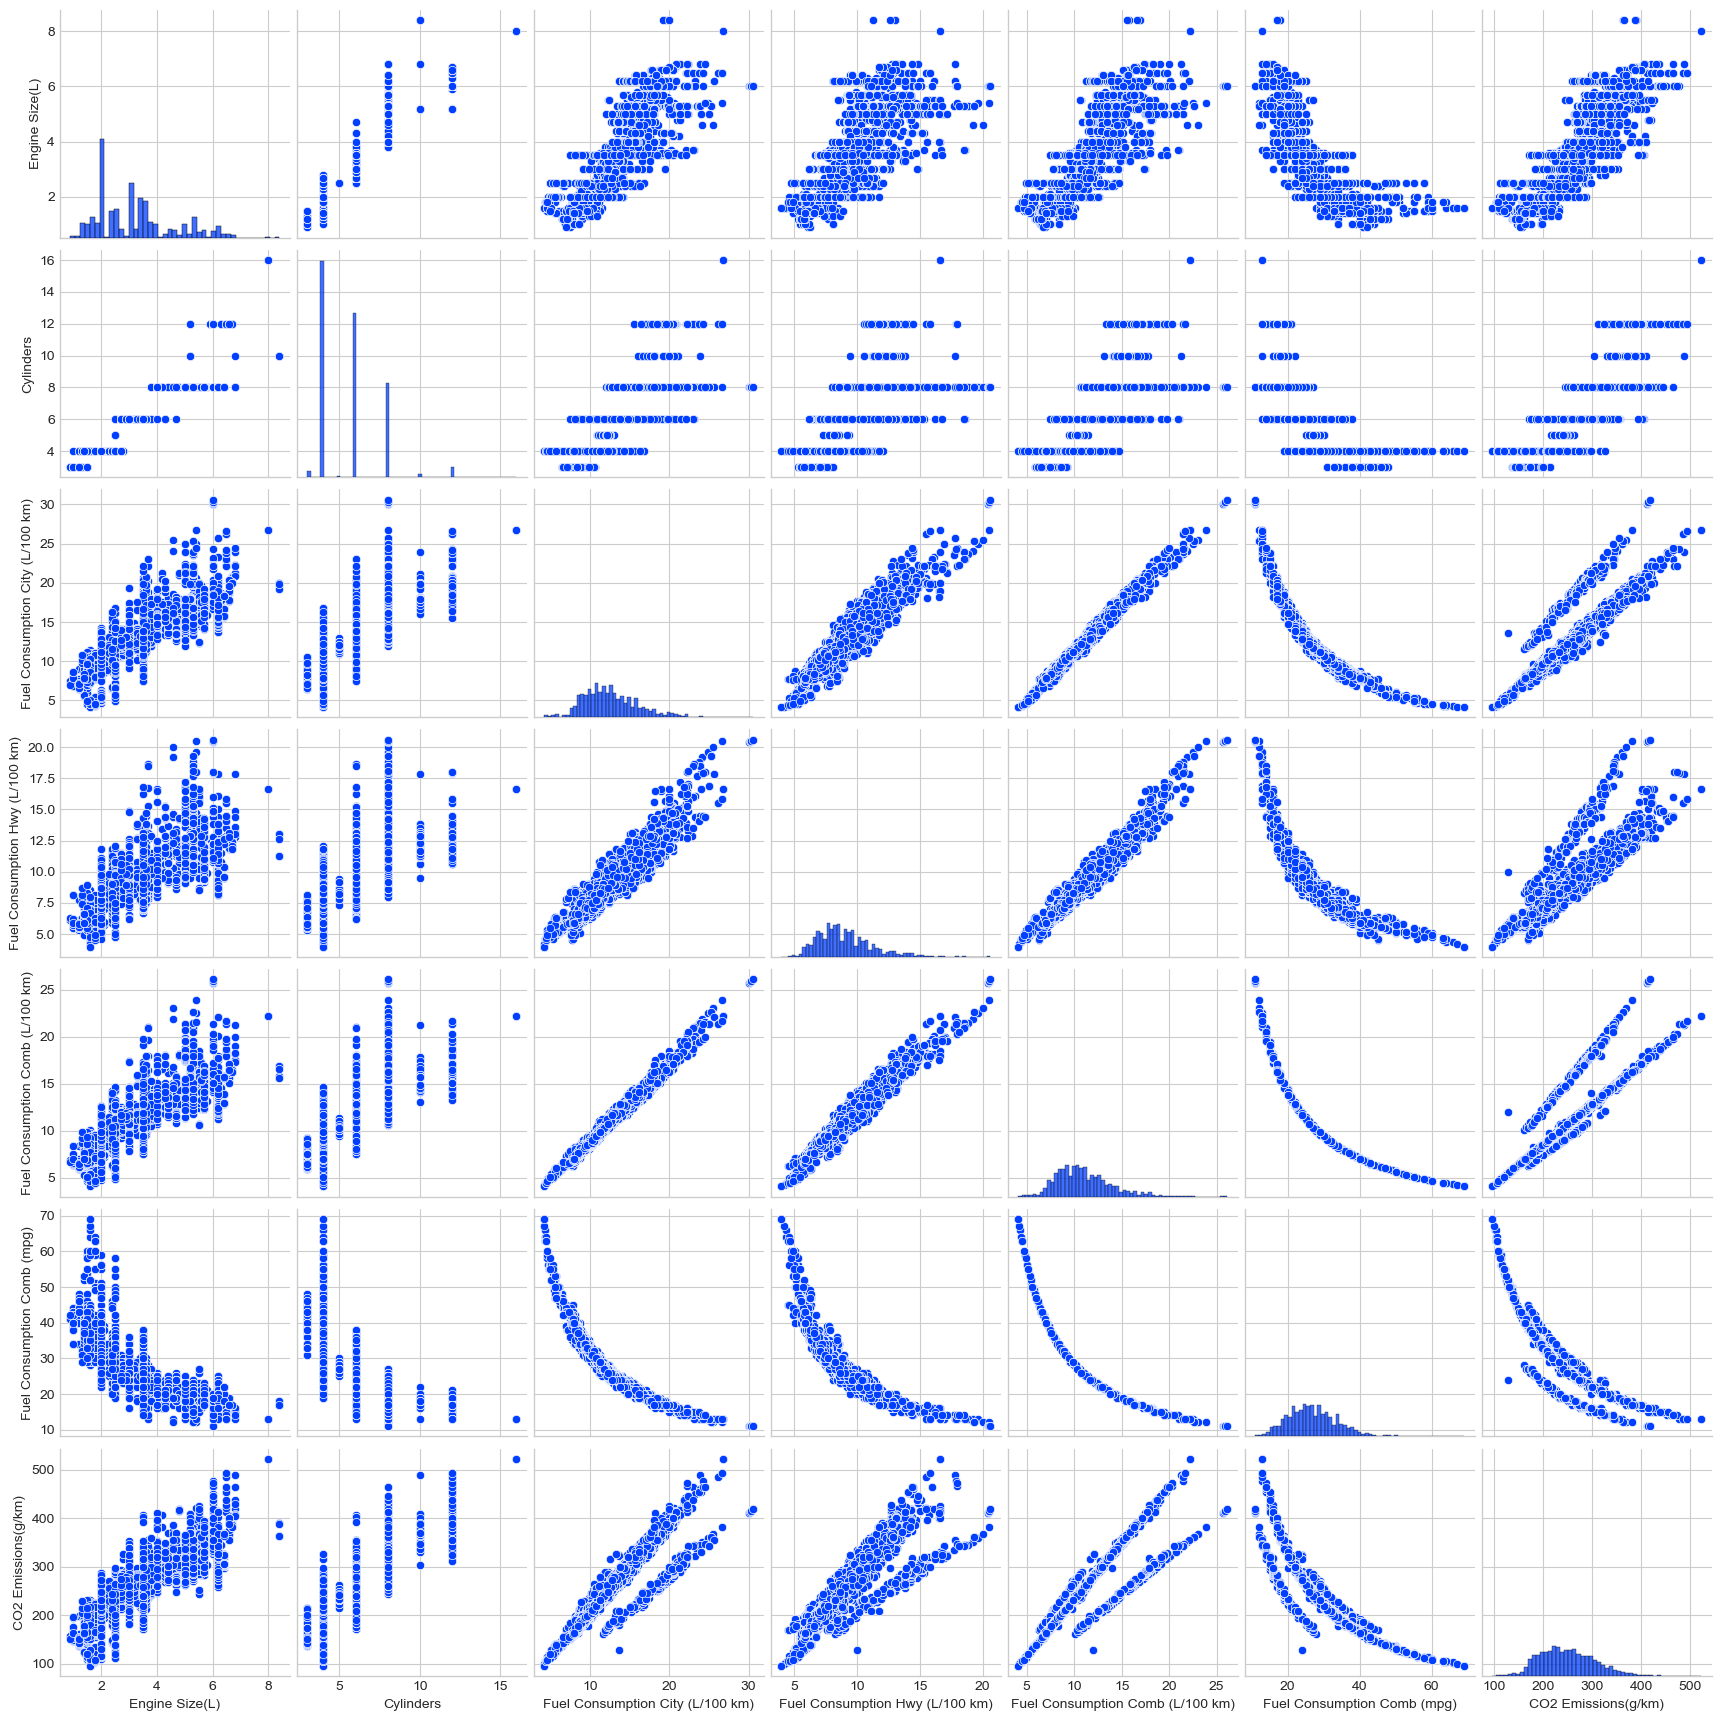

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sb.pairplot(df)
plt.savefig('pairplor.png')

In [7]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


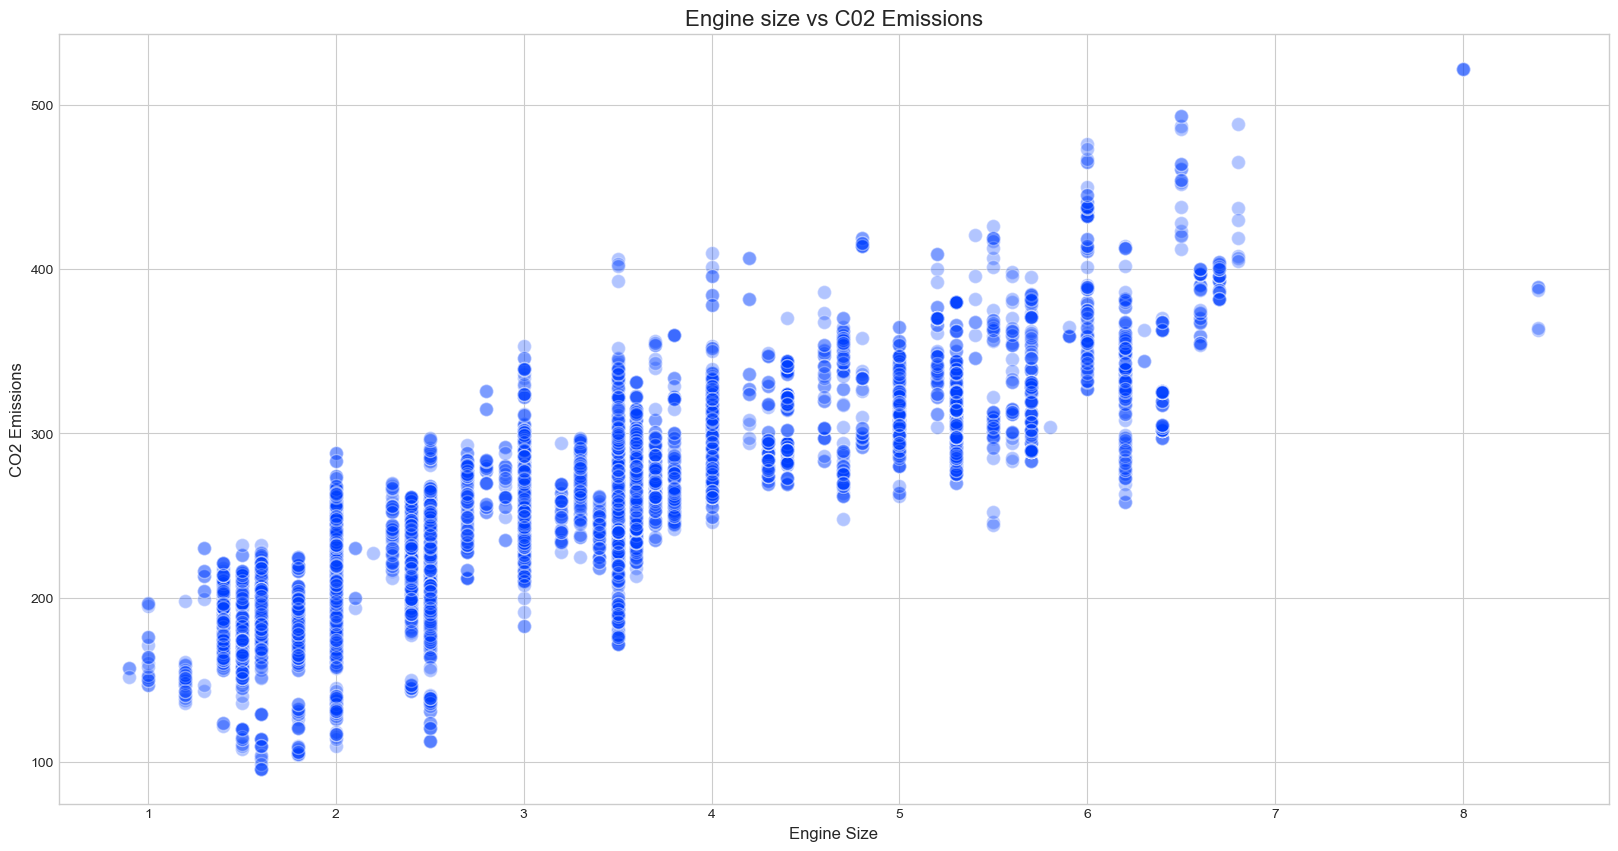

In [10]:
plt.scatter(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)',
data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Engine Size', fontsize = 12)
plt.savefig('enginesize_co2.png')

### Splitting into training and testing datasets (SLR)

In [21]:
from sklearn.model_selection import train_test_split

X_var = df[['Engine Size(L)']] # independent variable
y_var = df['CO2 Emissions(g/km)'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(
X_var, y_var, test_size = 0.3, random_state = 0)

### Training model (SLR)

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

### Checking accuracy (SLR)

In [23]:
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']),
lr.score(X_test, y_test))


R-Squared : 0.7162770226132333


### Checking accuracy (SLR)

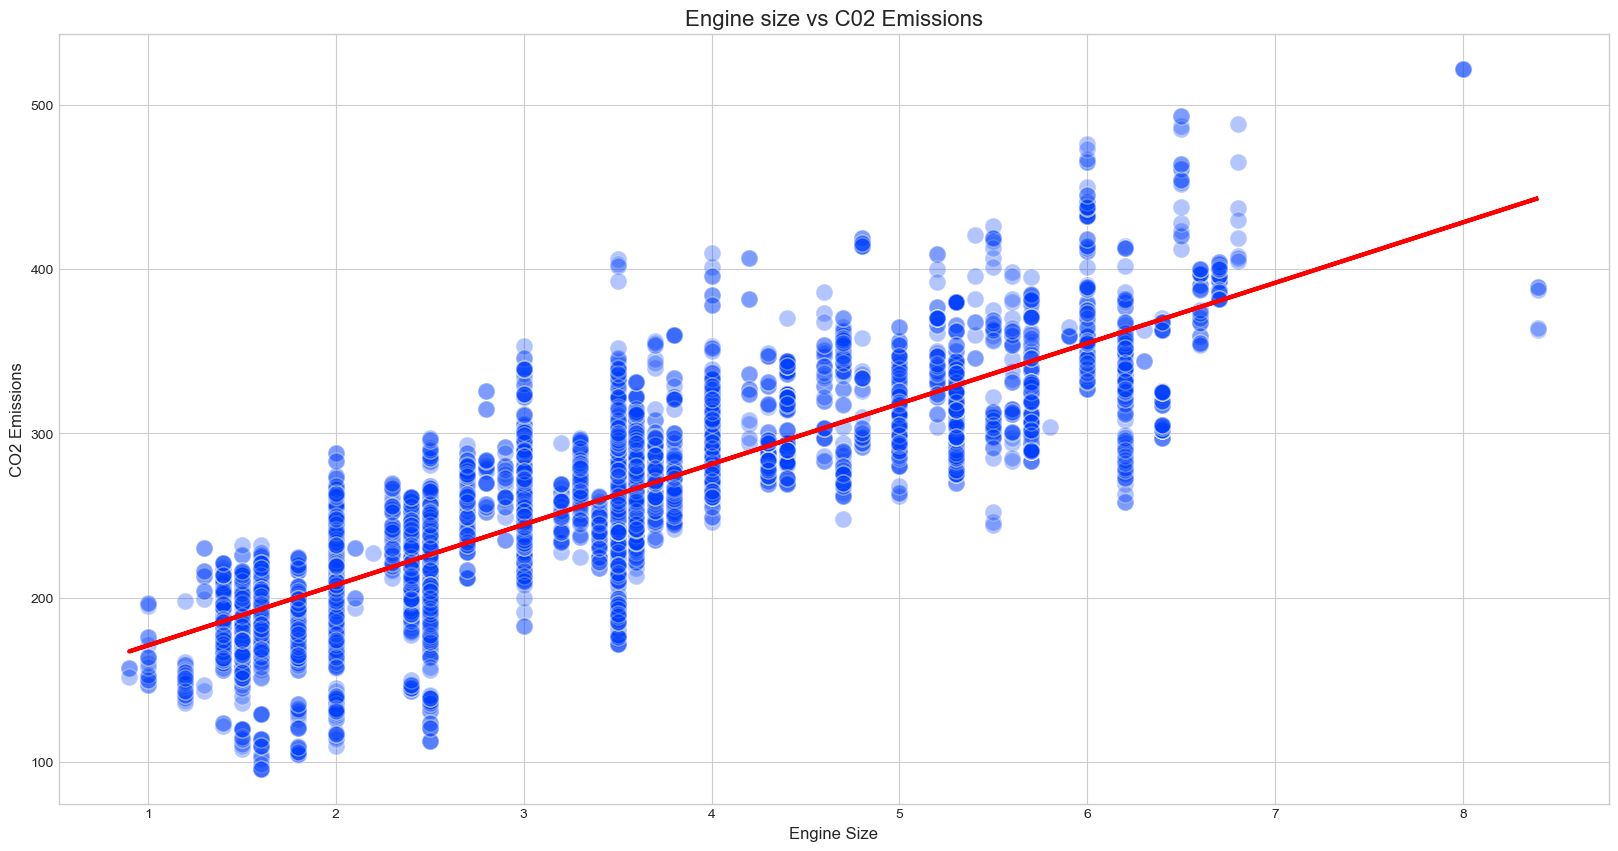

In [26]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)',
data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['Engine Size(L)'], slr_slope*df['Engine Size(L)'] + slr_intercept,
color = 'r', linewidth = 3)
plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Engine Size', fontsize = 12)

plt.savefig('enginesize_co2_fit.png')

### Splitting into training and testing datasets (MLR)

In [17]:
from sklearn.model_selection import train_test_split

X1_var = df[['Engine Size(L)',
'Fuel Consumption Comb (L/100 km)',
'Fuel Consumption Hwy (L/100 km)',
'Fuel Consumption City (L/100 km)']]
y_var = df['CO2 Emissions(g/km)'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(
X1_var,
y_var,
test_size = 0.3,
random_state = 0)

### Training model and checking out accuracy (MLR)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

### Checking accuracy (MLR)

In [19]:
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']),
lr.score(X_test, y_test))

R-Squared : 0.8655946234480003


### Checking accuracy (MLR)

/var/folders/8l/dq9nhgmx5gj01xrwhwzb41s40000gn/T/ipykernel_50111/537589420.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
/var/folders/8l/dq9nhgmx5gj01xrwhwzb41s40000gn/T/ipykernel_50111/537589420.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

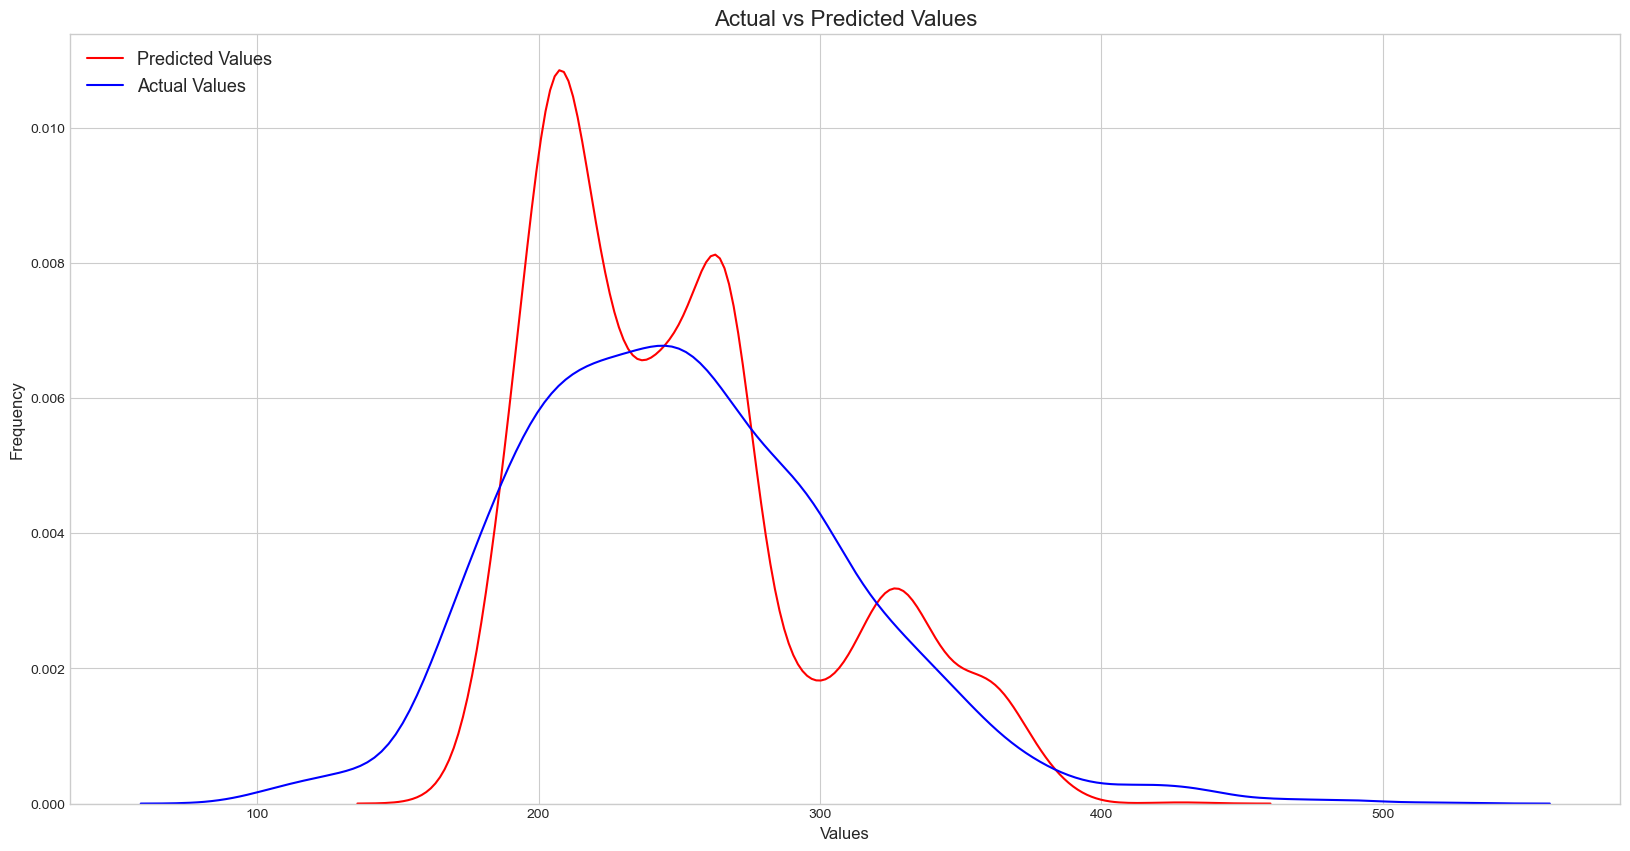

In [27]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
plt.savefig('ap.png')

### Fuel Consumption Comb (mpg)

In [ ]:
Fuel Consumption Comb (mpg)

In [29]:
from sklearn.model_selection import train_test_split

X_var = df[['Fuel Consumption Comb (mpg)']] # independent variable
y_var = df['CO2 Emissions(g/km)'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(
X_var, y_var, test_size = 0.3, random_state = 0)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [31]:
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']),
lr.score(X_test, y_test))


R-Squared : 0.8151474202697699


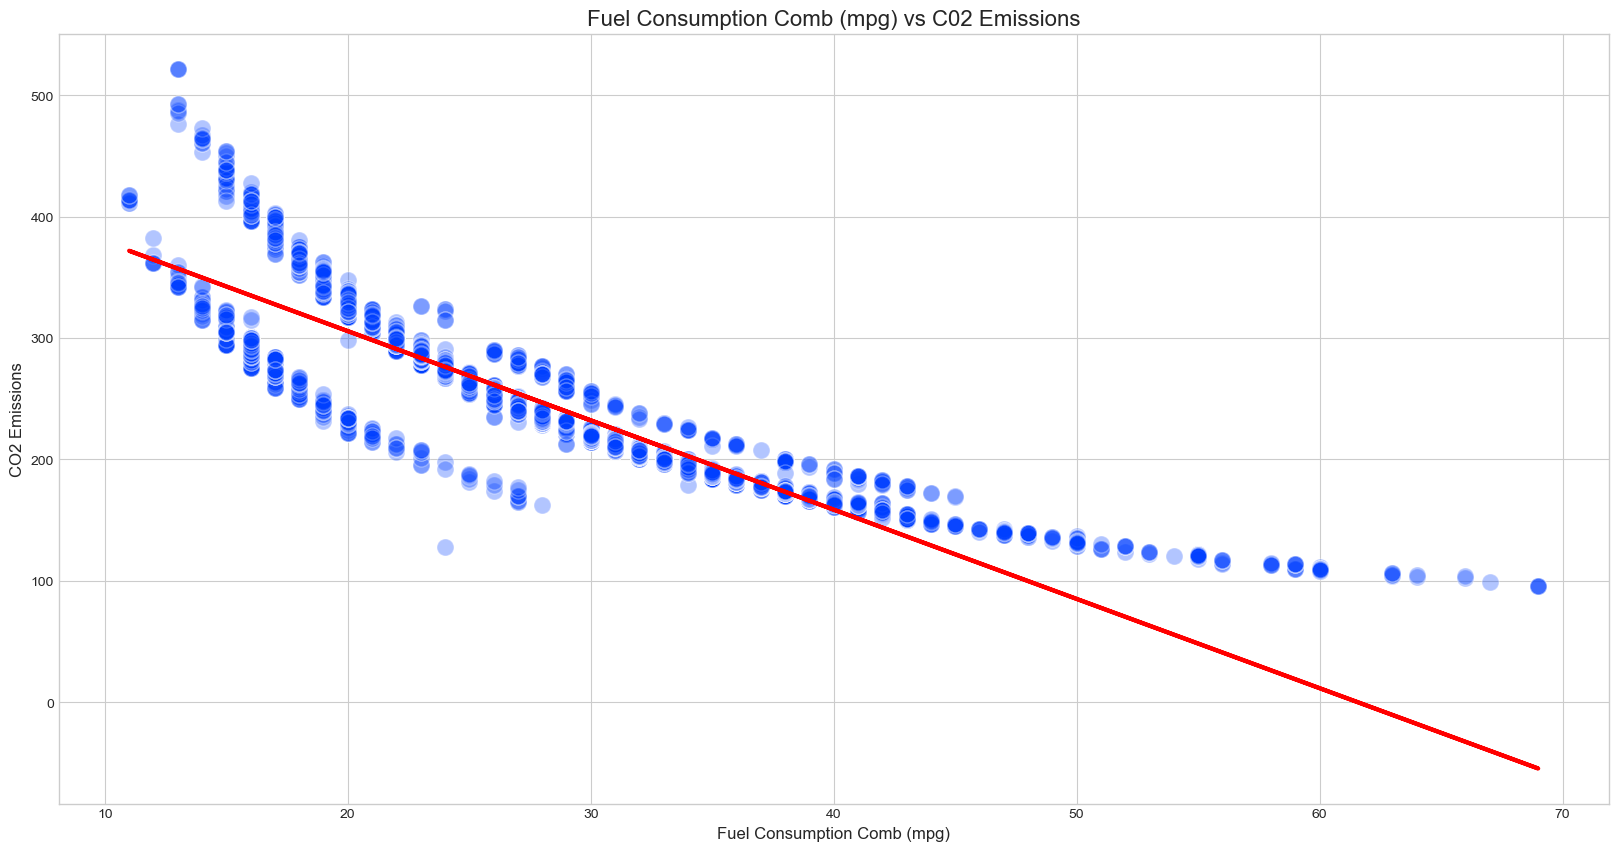

In [32]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'Fuel Consumption Comb (mpg)', y = 'CO2 Emissions(g/km)',
data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['Fuel Consumption Comb (mpg)'], slr_slope*df['Fuel Consumption Comb (mpg)'] + slr_intercept,
color = 'r', linewidth = 3)
plt.title('Fuel Consumption Comb (mpg) vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize = 12)

plt.savefig('enginesize_co2_fit.png')